# The Puell Multiple

In [90]:
import pandas as pd # Import Pandas
import plotly.express as px # Import Plotly
import numpy as np
from datetime import datetime, timedelta # Datetime Feature
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


### Import Coinmetrics API

In [2]:
# Import and initialize coinmetrics API (in this case `cm` for the Coinmetrics Community API)
import coinmetrics # Coinmetrics API
cm = coinmetrics.Community()

### List of Supported Assets

In [3]:
# List the assets Coin Metrics has data for:
supported_assets = cm.get_supported_assets()
print("supported assets:\n", supported_assets)

supported assets:
 ['1inch', 'aave', 'ada', 'alpha', 'ant', 'bal', 'bat', 'bch', 'bnb', 'bnb_bc', 'bnb_eth', 'bsv', 'btc', 'btg', 'busd', 'comp', 'cro', 'crv', 'cvc', 'dai', 'dash', 'dcr', 'dgb', 'dgx', 'doge', 'dot', 'drgn', 'elf', 'eng', 'eos', 'eos_eth', 'etc', 'eth', 'ethos', 'ftt', 'fun', 'fxc', 'gas', 'gno', 'gnt', 'grin', 'gusd', 'hbtc', 'hedg', 'ht', 'husd', 'icp', 'kcs', 'knc', 'lend', 'leo_eos', 'leo_eth', 'link', 'loom', 'lpt', 'lsk', 'ltc', 'maid', 'mana', 'matic_eth', 'mco', 'mkr', 'neo', 'nxm', 'omg', 'pax', 'paxg', 'pay', 'perp', 'pivx', 'poly', 'powr', 'ppt', 'qash', 'ren', 'renbtc', 'rep', 'rev_eth', 'sai', 'snt', 'snx', 'srm', 'sushi', 'swrv', 'trx', 'trx_eth', 'tusd', 'uma', 'uni', 'usdc', 'usdk', 'usdt', 'usdt_eth', 'usdt_omni', 'usdt_trx', 'vtc', 'waves', 'wbtc', 'weth', 'wnxm', 'wtc', 'xaut', 'xem', 'xlm', 'xmr', 'xrp', 'xtz', 'xvg', 'yfi', 'zec', 'zrx']


### List of Supported Metrics

In [4]:
# List all available metrics for a specific asset:
#INPUTS
asset = "btc"
available_data_types = cm.get_available_data_types_for_asset(asset)

# PRINT OUTPUT
print(f"These are the available data type for {asset}:\n \n", available_data_types)

These are the available data type for btc:
 
 ['AdrActCnt', 'AdrBal1in100KCnt', 'AdrBal1in100MCnt', 'AdrBal1in10BCnt', 'AdrBal1in10KCnt', 'AdrBal1in10MCnt', 'AdrBal1in1BCnt', 'AdrBal1in1KCnt', 'AdrBal1in1MCnt', 'AdrBalCnt', 'AdrBalNtv0.001Cnt', 'AdrBalNtv0.01Cnt', 'AdrBalNtv0.1Cnt', 'AdrBalNtv100Cnt', 'AdrBalNtv100KCnt', 'AdrBalNtv10Cnt', 'AdrBalNtv10KCnt', 'AdrBalNtv1Cnt', 'AdrBalNtv1KCnt', 'AdrBalNtv1MCnt', 'AdrBalUSD100Cnt', 'AdrBalUSD100KCnt', 'AdrBalUSD10Cnt', 'AdrBalUSD10KCnt', 'AdrBalUSD10MCnt', 'AdrBalUSD1Cnt', 'AdrBalUSD1KCnt', 'AdrBalUSD1MCnt', 'AssetEODCompletionTime', 'BlkCnt', 'BlkSizeMeanByte', 'BlkWghtMean', 'BlkWghtTot', 'CapAct1yrUSD', 'CapMVRVCur', 'CapMVRVFF', 'CapMrktCurUSD', 'CapMrktFFUSD', 'CapRealUSD', 'DiffLast', 'DiffMean', 'FeeByteMeanNtv', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'FlowInExNtv', 'FlowInExUSD', 'FlowOutExNtv', 'FlowOutExUSD', 'FlowTfrFromExCnt', 'HashRate', 'HashRate30d', 'IssContNtv', 'IssContPctAnn', 'Is

### Fetch API Data

In [5]:
#API

#INPUTS
asset = "btc"
metric = "PriceUSD"
begin_timestamp = "2014-04-15"  # Format = "####-##-##"   The `datetime` type is also accepted
end_timestamp = "2021-11-15"  # The `datetime` type is also accepted

#OUTPUT
asset_data = cm.get_asset_data_for_time_range(asset, metric, begin_timestamp, end_timestamp)
print(asset_data)

{'metrics': ['PriceUSD'], 'series': [{'time': '2014-04-15T00:00:00.000Z', 'values': ['521.615299606078']}, {'time': '2014-04-16T00:00:00.000Z', 'values': ['531.481846731999']}, {'time': '2014-04-17T00:00:00.000Z', 'values': ['499.837551544721']}, {'time': '2014-04-18T00:00:00.000Z', 'values': ['483.020013533606']}, {'time': '2014-04-19T00:00:00.000Z', 'values': ['504.365595178488']}, {'time': '2014-04-20T00:00:00.000Z', 'values': ['501.55718444916']}, {'time': '2014-04-21T00:00:00.000Z', 'values': ['498.084530300994']}, {'time': '2014-04-22T00:00:00.000Z', 'values': ['489.503510029223']}, {'time': '2014-04-23T00:00:00.000Z', 'values': ['490.63296754332']}, {'time': '2014-04-24T00:00:00.000Z', 'values': ['503.291801028638']}, {'time': '2014-04-25T00:00:00.000Z', 'values': ['466.426171344243']}, {'time': '2014-04-26T00:00:00.000Z', 'values': ['459.22670981882']}, {'time': '2014-04-27T00:00:00.000Z', 'values': ['438.709363717287']}, {'time': '2014-04-28T00:00:00.000Z', 'values': ['441.547

### Format Data into Pandas

In [6]:
# DATA INTO PANDAS

# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "price" : [],
#     "trading_days" : []
}

# Calculate the # of days trading
first_day_of_trading = 0
asset_days_trading = datetime.now() - datetime(2014,4,15)


# Use For Loop to interate through messy data and populate clean dictionary    
for entry in asset_data['series']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['price'].append(float(entry['values'][0]))
#     data_dictionary['trading_days'].append(0)



#Convert dictionary into Pandas dataframe and format to two decimals
asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format

# View dataframe from API
asset_data_df.head()

,date,price
0,2014-04-15T00:00:00.000Z,521.62
1,2014-04-16T00:00:00.000Z,531.48
2,2014-04-17T00:00:00.000Z,499.84
3,2014-04-18T00:00:00.000Z,483.02
4,2014-04-19T00:00:00.000Z,504.37


### Calculate the Trading Days

In [7]:
#Days Trading  (Trading started on 2009-1-2 at $0)

#set our current date to datetime formt
asset_data_df['date'] = pd.to_datetime(asset_data_df['date'])

#trading days becomes a column of the first trading day in the correct format to use for calculations and write overtop
asset_data_df['trading_days'] = pd.to_datetime("2009-01-02T00:00:00.000Z")

# tradings days = the price's current date minus the first day of trading
asset_data_df['trading_days'] = asset_data_df['date'] - asset_data_df['trading_days']

# convert datetime output in an integer
asset_data_df['trading_days'] = pd.to_numeric(asset_data_df['trading_days'].dt.days, downcast='integer')

asset_data_df.head()


,date,price,trading_days
0,2014-04-15 00:00:00+00:00,521.62,1929
1,2014-04-16 00:00:00+00:00,531.48,1930
2,2014-04-17 00:00:00+00:00,499.84,1931
3,2014-04-18 00:00:00+00:00,483.02,1932
4,2014-04-19 00:00:00+00:00,504.37,1933


### Puell Multiple Calculation

In [86]:
# CALC & APPEND BTC ISSUANCE

# Create a new column called "btcIssuance" and populate with data based on formula
# FORMULA EXPLAINED:
  # 7200 blocks/day = this is our starting point, the # of btc produced per day in the first era of bitcoin (pre-halving), 50 btc per block * 144 blocks per day = 7200 blocks/day
  # 2**(np.floor(df["index"]/1458) = determines which cycle of the halving we are in 
    # "2**"" means 2 to the power of....
    # np.floor = rounds down to the nearest whole number
    # index = our index column counts the days bitcoin has existed
    # 1458 = the # of days between each halving, 210,000 (# blocks before each halving) / 144 blocks per day = 1458.33    
    # (np.floor(df["index"]/1458) = which halving era we are in (ie. on day 365 we are still in the first era with 0 halvings yet, so the output would be 0)

# append bitcoin daily issuance in btc number of coins
asset_data_df["btcIssuance/day"] = 7200 / 2**(np.floor(asset_data_df["trading_days"]/1458))

# append bitcoin daily issuance in us dollars
asset_data_df["usdIssuance/day"] = asset_data_df["btcIssuance/day"]* asset_data_df["price"]

# append 365-day moving average of daily btc issuance in us dollars 
asset_data_df["usdIssuance/day_MA"] = asset_data_df["usdIssuance/day"].rolling(window=365).mean()

# append puell multiple calculation
asset_data_df["puell_multiple"] = asset_data_df["usdIssuance/day"] / asset_data_df["usdIssuance/day_MA"]

asset_data_df.tail()


,date,price,trading_days,btcIssuance/day,usdIssuance/day,usdIssuance/day_MA,puell_multiple,sell_limit,buy_limit
2767,2021-11-11 00:00:00+00:00,"64,962.93",4696,900.00,"58,466,638.16","40,651,788.42",1.44,4,0.50
2768,2021-11-12 00:00:00+00:00,"64,078.97",4697,900.00,"57,671,071.23","40,729,458.02",1.42,4,0.50
2769,2021-11-13 00:00:00+00:00,"64,397.79",4698,900.00,"57,958,012.09","40,807,715.28",1.42,4,0.50
2770,2021-11-14 00:00:00+00:00,"65,032.23",4699,900.00,"58,529,003.09","40,888,661.54",1.43,4,0.50
2771,2021-11-15 00:00:00+00:00,"63,753.50",4700,900.00,"57,378,152.84","40,967,023.17",1.40,4,0.50


### Buy / Sell Indicators

In [164]:
# append upper sell limit
asset_data_df["sell_limit"] = 4

# append upper buy limit
asset_data_df["buy_limit"] = .5

# append buy / sell signal
asset_data_df.loc[asset_data_df['puell_multiple'] < .5, 'buy/sell_signal'] = 1
asset_data_df.loc[asset_data_df['puell_multiple'] > 4, 'buy/sell_signal'] = -1
asset_data_df.loc[asset_data_df['puell_multiple'].between(.5, 4) , 'buy/sell_signal'] = 0

asset_data_df.head()

# locate individual entries
# asset_data_df.loc[1500, :]

,date,price,trading_days,btcIssuance/day,usdIssuance/day,usdIssuance/day_MA,puell_multiple,sell_limit,buy_limit,buy/sell,buy_signal,sell_signal,buy/sell_signal
0,2014-04-15 00:00:00+00:00,521.62,1929,"3,600.00","1,877,815.08",NaN,NaN,4,0.50,0,NaN,NaN,NaN
1,2014-04-16 00:00:00+00:00,531.48,1930,"3,600.00","1,913,334.65",NaN,NaN,4,0.50,0,NaN,NaN,NaN
2,2014-04-17 00:00:00+00:00,499.84,1931,"3,600.00","1,799,415.19",NaN,NaN,4,0.50,0,NaN,NaN,NaN
3,2014-04-18 00:00:00+00:00,483.02,1932,"3,600.00","1,738,872.05",NaN,NaN,4,0.50,0,NaN,NaN,NaN
4,2014-04-19 00:00:00+00:00,504.37,1933,"3,600.00","1,815,716.14",NaN,NaN,4,0.50,0,NaN,NaN,NaN


### Plotting • Matplot

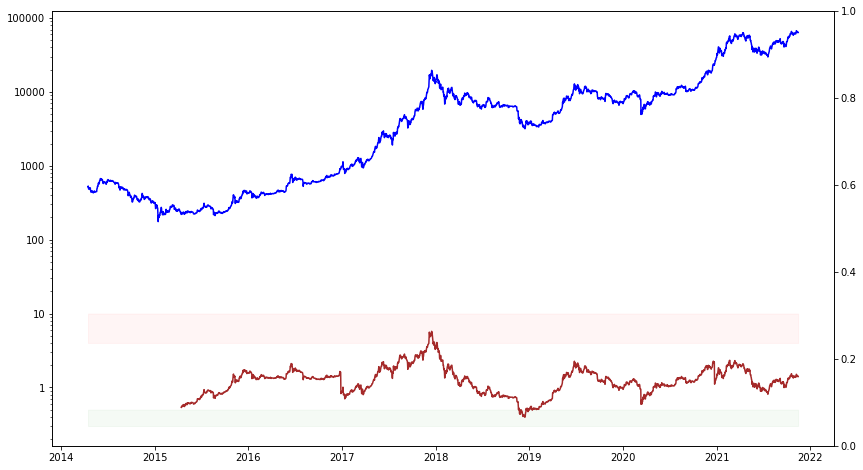

In [65]:
asset_data_df['date'] = pd.to_datetime(asset_data_df['date'],format = '%Y-%m-%d')


fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.fill_between(asset_data_df['date'],4,10, color="red", alpha = .04)
ax.fill_between(asset_data_df['date'],0.3,0.5, color="green", alpha = .04)

ax.semilogy(asset_data_df['date'], asset_data_df["puell_multiple"], color = "brown")
ax.semilogy(asset_data_df['date'], asset_data_df["price"], color = "blue")

ax.yaxis.set_major_formatter("{x:.0f}")
plt.rcParams["figure.figsize"] = (14,8)
plt.show()


### Plotting • Plotly

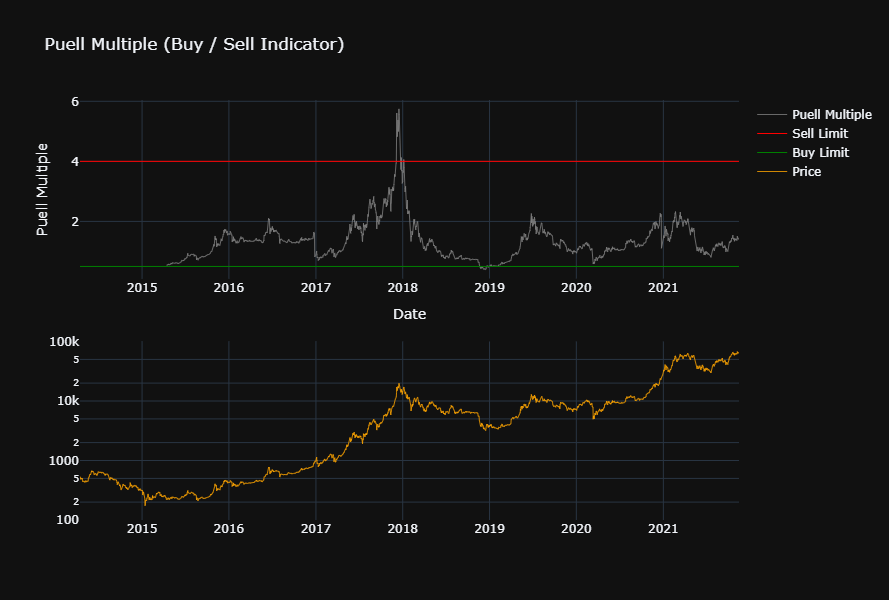

In [138]:
# Initial a figure setup for supplots
puell_fig = make_subplots(rows=2, cols=1) # Creating two tables on top of eachother with shared x axis

# Puell Multiple items in row 1
puell_fig.add_trace(go.Scatter(x=asset_data_df['date'], y= asset_data_df["puell_multiple"], line=dict (color='grey', width=.8), name = 'Puell Multiple',), col=1, row=1)
puell_fig.add_trace(go.Scatter(x=asset_data_df['date'], y= asset_data_df["sell_limit"], line=dict (color='red', width=1), name = 'Sell Limit'), col=1, row=1)
puell_fig.add_trace(go.Scatter(x=asset_data_df['date'], y= asset_data_df["buy_limit"], line=dict (color='green', width=1), name = 'Buy Limit'), col=1, row=1)

# Price items in row 2
puell_fig.add_trace(go.Scatter(x=asset_data_df['date'], y= asset_data_df["price"], line=dict (color='orange', width=.8), name = 'Price', ), col=1, row=2)

# Global parameters to the entire chart
puell_fig.update_layout(template="plotly_dark", title='Puell Multiple (Buy / Sell Indicator)',xaxis_title='Date',yaxis_title='Puell Multiple', height = 600)
puell_fig.update_yaxes(type="log", range=[2,5],  col=1, row=2)


puell_fig.show()
